
# Global renewable energy production analysis
##### Análisis de la producción de energía renovable en el mundo

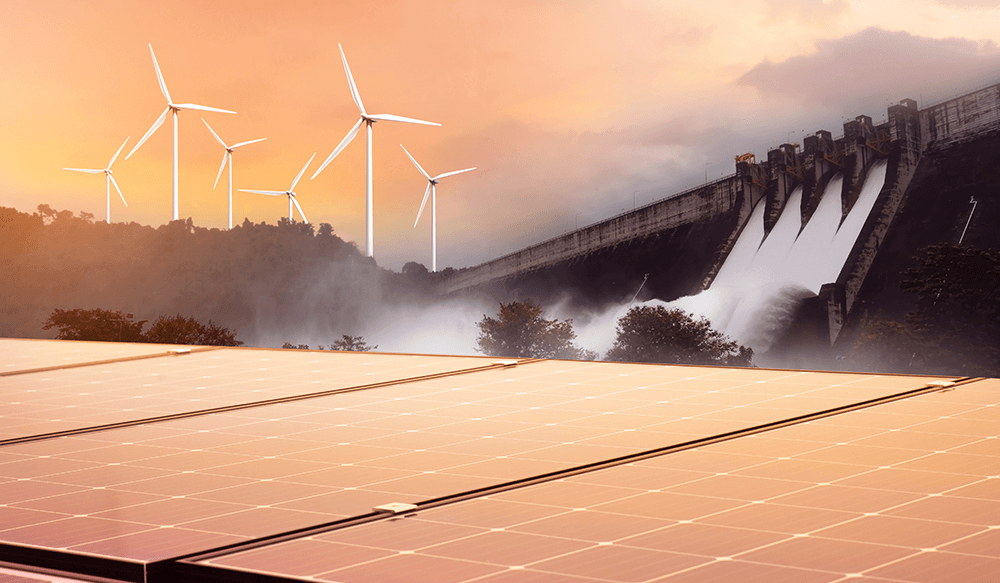

#### <span style='background :green' > Import libraries </span>
###### Importamos librerías

In [723]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Let's read the csv file using pandas
###### We also drop columns that we don't need for this analysis

##### Leamos el archivo csv usando pandas
###### También quitamos las columnas que no necesitamos para este análisis

In [724]:
df = pd.read_csv(r'C:\Users\Orbit\Documents\Data Analysis Projects\csvs\renewable_energy.csv').drop(columns=['Flag Codes','INDICATOR','FREQUENCY'])
df

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,TOT,KTOE,1960,4436.932
1,AUS,TOT,KTOE,1961,4490.510
2,AUS,TOT,KTOE,1962,4407.097
3,AUS,TOT,KTOE,1963,4628.738
4,AUS,TOT,KTOE,1964,4497.396
...,...,...,...,...,...
15899,OECD,TOT,PC_PRYENRGSUPPLY,2011,8.150
15900,OECD,TOT,PC_PRYENRGSUPPLY,2012,8.710
15901,OECD,TOT,PC_PRYENRGSUPPLY,2013,9.160
15902,OECD,TOT,PC_PRYENRGSUPPLY,2014,9.380


###### We verify each datatype we have in this dataset
###### Verificamos cada uno de los tipo de dato que se encuentra en el conjunto de datos

In [725]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15904 entries, 0 to 15903
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LOCATION  15904 non-null  object 
 1   SUBJECT   15904 non-null  object 
 2   MEASURE   15904 non-null  object 
 3   TIME      15904 non-null  int64  
 4   Value     12017 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 621.4+ KB


###

##### <span style='background :green' > Filtering data between 2005 and 2015 </span>
###### Filtramos los datos en los años 2005 y 2015

In [726]:
current_year = 2015
last_decade_start_year = current_year - 10
df_last_decade = df[df['TIME']>=last_decade_start_year]
df_last_decade

,LOCATION,SUBJECT,MEASURE,TIME,Value
45,AUS,TOT,KTOE,2005,6461.722
46,AUS,TOT,KTOE,2006,6651.906
47,AUS,TOT,KTOE,2007,6874.019
48,AUS,TOT,KTOE,2008,7055.723
49,AUS,TOT,KTOE,2009,5619.582
...,...,...,...,...,...
15899,OECD,TOT,PC_PRYENRGSUPPLY,2011,8.150
15900,OECD,TOT,PC_PRYENRGSUPPLY,2012,8.710
15901,OECD,TOT,PC_PRYENRGSUPPLY,2013,9.160
15902,OECD,TOT,PC_PRYENRGSUPPLY,2014,9.380


##### We group the data by country and calculate the sum of renewable energy production
###### Agrupamos los datos por pais y determinamos la suma de la producción de energia renovable

In [727]:
df_grouped = df_last_decade.groupby('LOCATION')['Value'].sum()
df_grouped

LOCATION
AGO    6.912812e+04
ALB    6.882901e+03
ARE    5.528600e+02
ARG    5.991736e+04
ARM    1.975871e+03
           ...     
WLD    1.648920e+07
YEM    1.027383e+03
ZAF    1.473033e+05
ZMB    7.864652e+04
ZWE    7.195039e+04
Name: Value, Length: 142, dtype: float64

##### Filtering the dataset for the top 10 countries by renewable energy production
###### We also remove the rows which are not countries.
##### Filtramos el conjunto de datos para los 10 paises con mayor producción de energía renovable
###### Quitamos ademas las filas que no son paises. 

In [728]:
#Filtering the dataset for the top 10 countries by renewable energy production
top_10_countries = df_grouped.sort_values(ascending = False).drop(labels=['WLD','G20','OECD','OEU','EU28'], axis=0, inplace=False).head(10)
top_10_countries

LOCATION
CHN    2843320.452
IND    1895683.411
USA    1405126.734
BRA    1094226.631
NGA     972644.229
IDN     697078.296
CAN     514295.959
ETH     403476.498
PAK     319098.361
DEU     306315.929
Name: Value, dtype: float64

###### We can see China has the highest renewable energy production with 2,843,320 kTOE (which means kilotonnes of oil equivalent) alongside India and United States. Let's graph to better see the results.
###### Podemos observar que China posee la mayor producción de energia renovable con una cantidad de 2.843.320 kTOE (que significa kilo toneladas equivalentes de petróleo) conjunto con India y Estados Unidos. Vamos a graficar para poder apreciar mejor los resultados

#### <span style='background :green' > Top 10 Countries with the most renewable energy production KTOE 2005-2015 </span>
#### Los 10 principales paises con mayor producción de energía renovable

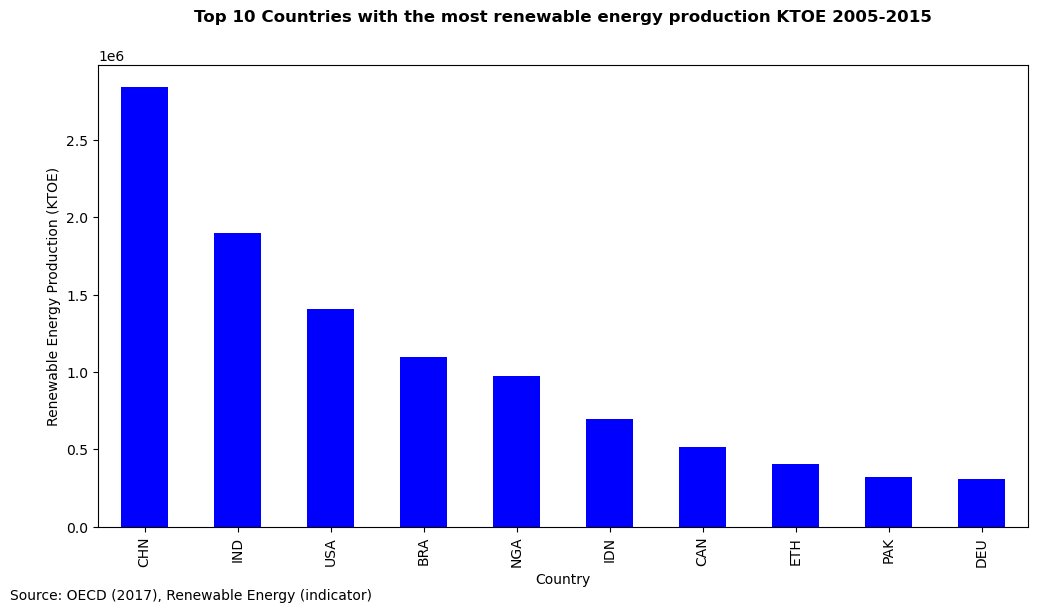

In [729]:
#Barplot 
plt.figure(figsize=(12,6))
top_10_countries.plot(kind='bar', color= ['blue'])
plt.xlabel('Country')
plt.ylabel('Renewable Energy Production (KTOE)')
plt.title('Top 10 Countries with the most renewable energy production KTOE 2005-2015\n\n', color='black', weight ='bold')
plt.text(0.1, -0.15, 'Source: OECD (2017), Renewable Energy (indicator)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)
plt.show()

In [730]:
#USA Renewable Energy Production over time
df_usa = df[(df['LOCATION']) =='USA']
df_usa

,LOCATION,SUBJECT,MEASURE,TIME,Value
1624,USA,TOT,KTOE,1960,45072.416
1625,USA,TOT,KTOE,1961,45036.336
1626,USA,TOT,KTOE,1962,46657.406
1627,USA,TOT,KTOE,1963,47027.449
1628,USA,TOT,KTOE,1964,48340.512
...,...,...,...,...,...
9627,USA,TOT,PC_PRYENRGSUPPLY,2011,6.120
9628,USA,TOT,PC_PRYENRGSUPPLY,2012,6.430
9629,USA,TOT,PC_PRYENRGSUPPLY,2013,6.790
9630,USA,TOT,PC_PRYENRGSUPPLY,2014,6.870


In [731]:
#Looking for the max value of renewable energy production in the USA
df_usa['Value'].describe()


count       112.000000
mean      44934.308571
std       49345.977553
min           3.610000
25%           4.670000
50%       22521.603000
75%       97447.498000
max      152314.948000
Name: Value, dtype: float64

#### <span style='background :green' > Renewable Energy Production in United States over time  </span>
##### Producción de energía renovable en Estados Unidos a través del tiempo

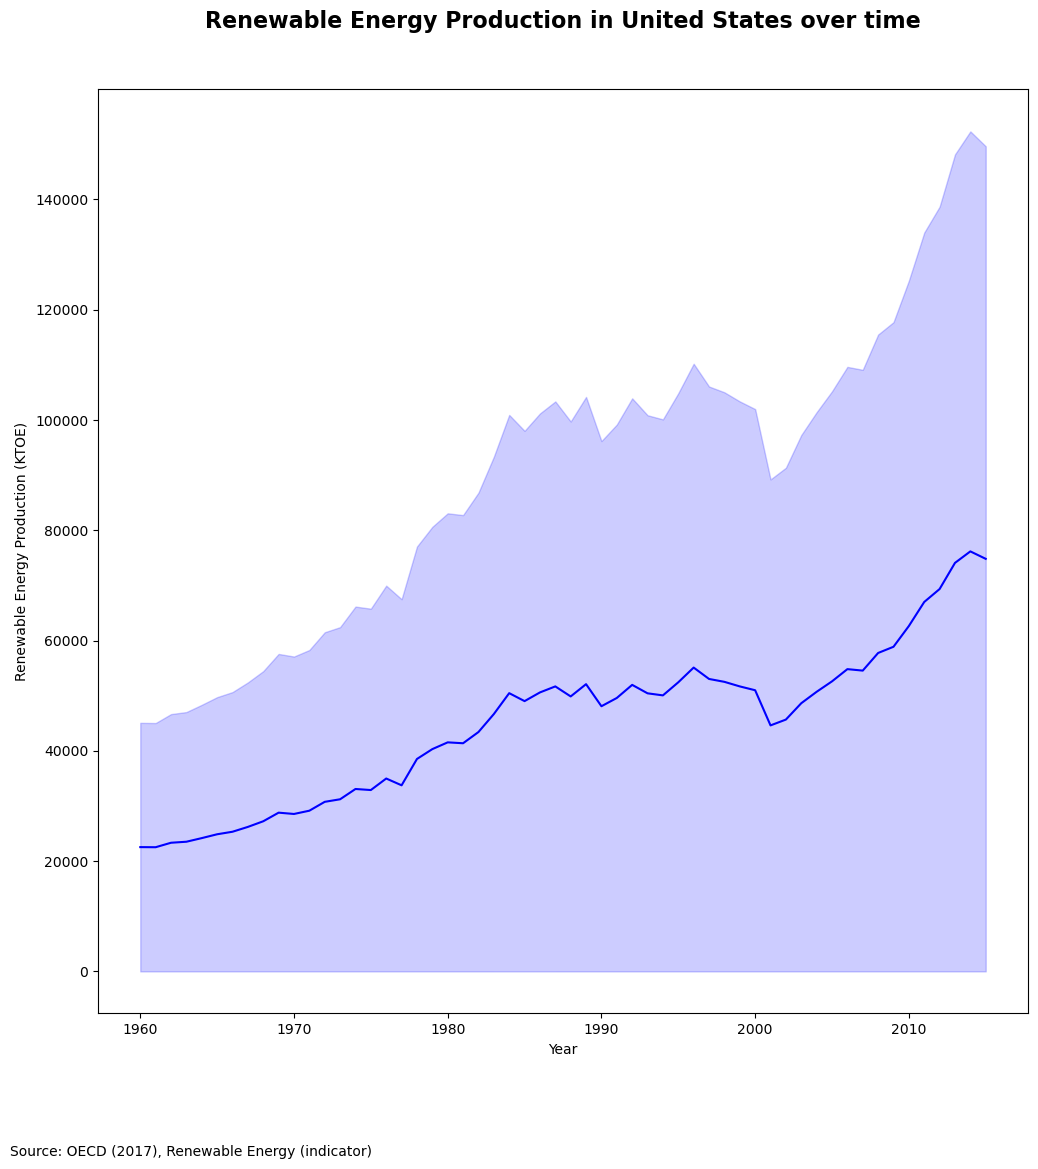

In [732]:
#Lineplot
plt.figure(figsize =(12,12))
sns.lineplot(data=df_usa, x='TIME', y='Value', color='blue')
plt.title('Renewable Energy Production in United States over time\n\n', weight='bold', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Renewable Energy Production (KTOE)')
plt.text(0.1, -0.15, 'Source: OECD (2017), Renewable Energy (indicator)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)
plt.show()

###### We can see a constant growth over time in terms of renewable energy production, especially since 2000. It is important to note that each decade has a slight decline in production.
###### Podemos observar un crecimiento constante a lo largo del tiempo en cuanto a la producción de energía renovable, especialmente a partir del año 2000. Es importante destacar que cada decada se aprecia un leve decaimiento en la producción.

#### <span style='background :green' > Renewable energy production by country in 2013. </span>
###### In this case, we adjust a threshold to avoid clustering in each country of the pie chart. We also remove the rows which are not considered countries.


##### Producción de energía renovable por paises en 2013
###### Para este caso, ajustamos un limite de producción de energía renovable para evitar que se agrupen los paises en el gráfico circular. Además, quitamos las filas que no se consideran paises


In [733]:
threshold = 60000
df.loc[df['Value'] <= threshold, 'LOCATION'] = 'Others'
df_2013 = df[df['TIME']== 2013]
grouped_df = df_2013[df_2013['Value'] > 0].groupby('LOCATION')['Value'].sum().sort_values(ascending = False).drop(labels=['WLD','G20','OECD','OEU','EU28'], axis=0, inplace=False)
grouped_df



LOCATION
Others    808708.733
CHN       325517.442
IND       205396.754
USA       148145.351
BRA       115748.992
NGA       109043.596
IDN        75513.543
Name: Value, dtype: float64

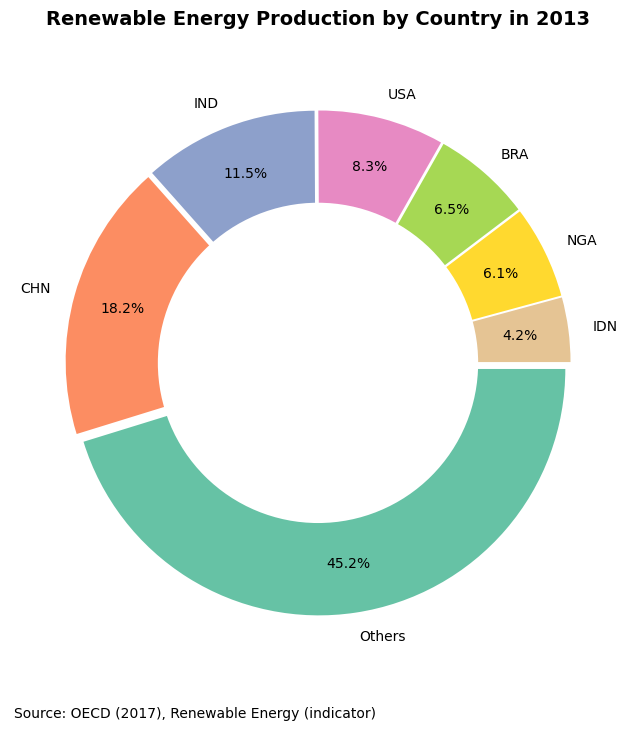

In [734]:
#Pie chart by Country (Year 2013)
plt.figure(figsize=(8,8))
colors=sns.color_palette('Set2')

plt.pie(
    grouped_df, 
    labels=grouped_df.index, 
    autopct='%1.1f%%', #Show percentages
    pctdistance=0.80, #Move the percentage inside the arcs 
    colors=colors,
    counterclock=False,
    explode=[0.025,0.025,0.025,0.025,0.025,0.025,0.025]
    )
    
#Add a hole in the pie chart
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Renewable Energy Production by Country in 2013\n', weight='bold', fontsize= 14)
plt.text(0.3, -0.07, 'Source: OECD (2017), Renewable Energy (indicator)', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=10)
plt.show()


###### In this chart, we have China with 18.2% of the global renewable energy production, alongside India with 11.5% and United States with 8.3%. There's also another label called Others which has 45.2%, which includes all the countries that doesn't have a lot of production.
###### En este gráfico, tenemos a China con el 18,2% de la producción mundial de energía renovable, junto a India con el 11,5% y Estados Unidos con el 8,3%. También hay otro título llamado 'Otros' que tiene el 45,2%, que incluye a todos los países que no tienen mucha producción.
